Reference: 
    * 핸즈온 머신러닝
    * http://research.sualab.com/introduction/practice/2019/02/19/bayesian-optimization-overview-1.html
    * https://scikit-optimize.github.io/

In [48]:
%matplotlib inline

# 자료형
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# hyperparameter tuning
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# model
from sklearn.ensemble import RandomForestClassifier

## Read data

In [8]:
train = pd.read_csv('../Data/kaggle/digit/train.csv')
print(train.shape)
train.sample()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41395,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'label: 1')

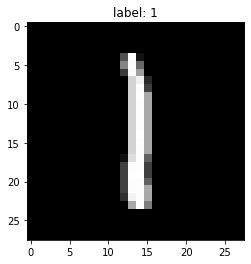

In [9]:
# 숫자 뽑아보기
idx = 1000
plt.imshow(train.iloc[idx, 1:].values.reshape(28, 28), cmap='gray')
plt.title('label: {}'.format(train.iloc[idx, 0]))

## EDA

In [12]:
# pass

## Preprocessing

In [13]:
# pass

In [21]:
y = train['label']
X = train.drop('label', axis=1)

## 본격적인 파라미터 튜닝에 앞서,
* 머신러닝 기초 교육 마지막입니다! 짝짝짝! 여기까지 수업 들으시느라 고생하셨어요.
* 파라미터 튜닝은 맨 마지막에 모델의 정확도를 극대화하기 위한 작업입니다. 이전에 EDA, feature engineering, 모델 선정 등의 작업이 잘 되었을 때에 의미가 있습니다.
* 하이퍼 파라미터에 대한 이해가 있을 때에 작업해야 합니다. 파라미터가 모델에서 어떤 역할을 하는지 모르면서 튜닝을 할 수는 없습니다.

## Grid Search

In [15]:
forest = RandomForestClassifier(random_state=42)

* n_estimators: 나무 갯수 (컴퓨터가 견디는 한 많이 하면 좋으나, 계산량이 비례해서 늘어납니다.)
* max_features: The number of features to consider when looking for the best split:  
  (feature 갯수가 많을 때 연산량을 줄일 수 있습니다. / 나무를 더 random하게 만들 수 있습니다..)
    - If `int`, then consider max_features features at each split.
    - If `float`, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
* bootstrap: 복원 추출, 비복원 추출  
  (배깅 bagging과 페이스팅 pasting이라고도 합니다.)

In [34]:
param_grid = [
    {'n_estimators': [100],
     'max_features': [0.5, 0.7, 0.9, None],
     'bootstrap': [True, False]} 
]

In [136]:
# scoring options
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


In [42]:
grid_search = GridSearchCV(forest,
                           param_grid,
                           cv=5,
                           random_state=42,
                           scoring='accuracy',
                           return_train_score=True,
                           n_jobs=2,
                           verbose=1)

In [43]:
grid_search.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed: 27.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=2,
             param_grid=[{'bo

best random forest 모델에 바로 접근할 수 있습니다.  
`.predict()`, `.predict_proba()` 처럼 sklearn 모델에 사용할 수 있는 모든 method를 사용할 수 있습니다.

In [137]:
grid_search.best_estimator_
# grid_search.best_estimator_.predict()

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

만들어 준 모든 grid combination에 대해서 만들어진 random forest에 대해 mean_test_score를 출력합니다.  
* 왜 mean_test_score인가?: 각 다른 하이퍼 파라미터를 가진 모델들의 성능을 평가하기 위해 각 모델에 Cross-validation 방식으로 평가를 진행하기 때문입니다. 각 폴드마다 score가 나오므로 그것을 평균하며 모델의 대표 평가 지표로 활용합니다.
* best parameter는 정말 best인가?: 아닐 수 있다. 우리가 정해준 grid 안에서 하이퍼 파라미터를 넣고 평가하기 때문에 grid 밖의 parameter는 서칭하지 않았다. 또한, grid를 충분히 촘촘하게 주지 않았다면 grid 사이에도 global best parameter가 존재할 수 있다.
* 아래 결과를 이용해 다시 parameter search를 하고싶어요: 처음에는 퍼포먼스가 잘 나오는 parameter 근처에서 찾아보세요. best parameter가 grid의 가장자리에 있다면 그 가장자리 너머에 best가 있을 수 있어요. 다음 grid를 설정할 때에 참고하세요.

In [96]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9416666666666667 {'bootstrap': True, 'max_features': 0.5, 'n_estimators': 10}
0.9392619047619047 {'bootstrap': True, 'max_features': 0.7, 'n_estimators': 10}
0.9307142857142857 {'bootstrap': True, 'max_features': 0.9, 'n_estimators': 10}
0.9291904761904762 {'bootstrap': True, 'max_features': None, 'n_estimators': 10}
0.9474523809523809 {'bootstrap': False, 'max_features': 0.5, 'n_estimators': 10}
0.9367380952380953 {'bootstrap': False, 'max_features': 0.7, 'n_estimators': 10}
0.9049285714285714 {'bootstrap': False, 'max_features': 0.9, 'n_estimators': 10}
0.8668095238095238 {'bootstrap': False, 'max_features': None, 'n_estimators': 10}


* GridSearch의 옵션 중 refit이 True로 되어있다면 교차 검증으로 최적의 추정기를 찾은 다음 전체 훈련 세트로 다시 훈련 시킵니다. 일반적으로 데이터가 많을 수록 성능이 향상되기 때문입니다.

## Random Search
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [97]:
from scipy.stats import uniform as sp_uniform # float uniform dist
from scipy.stats import randint as sp_randint # int uniform dist

시도해 볼 grid를 직접 설정하는 grid search와 다르게, 서치 할 영역과 distribution만 주고 random하게 하이퍼파라미터를 서칭하도록 하는 방법입니다. 아래 예시에서 max_features와 max_depth의 경우에 각각 실수로, 정수로 서치할 영역을 정해주었습니다.

In [98]:
param_dist = {'max_features': sp_uniform(0.3, 0.5),
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'n_estimators': [100],
              'max_depth': sp_randint(5, 25)}

In [99]:
random_search = RandomizedSearchCV(forest, param_dist, 
                                   n_iter=100, cv=5, 
                                   verbose=1, n_jobs=-1)

In [100]:
random_search.fit(X, y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   37.6s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [87]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 0.31153121252070787,
 'n_estimators': 100}

In [89]:
cvres = random_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9571904761904761 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 19, 'max_features': 0.6659969709057025, 'n_estimators': 100}
0.9484761904761905 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 11, 'max_features': 0.5229163764267956, 'n_estimators': 100}
0.9535238095238096 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 0.7330880728874676, 'n_estimators': 100}
0.9012142857142857 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 0.3102922471479012, 'n_estimators': 100}
0.9504761904761905 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 16, 'max_features': 0.7692763545078751, 'n_estimators': 100}
0.8085238095238095 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.45212112147976885, 'n_estimators': 100}
0.964 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 16, 'max_features': 0.31153121252070787, 'n_estimators': 100}
0.958 {'bootstrap': True, 'criterion': 'gini', 'max_depth':

## 나만의 Best 모델을 찾아 test 데이터를 예측하고, kaggle에 제출해보세요.

In [138]:
# Answer